In [1]:
import secrets ## for automatic model naming

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import mlflow
from mlflow import log_metric, log_param, log_artifact
from mlflow.sklearn import save_model

Set the `uri` that you were given here. This targets my EC2 server with `MLflow` running

In [5]:
if uri is None:
    raise ValueError("Get the URI for the MLflow server in order to run this notebook")
mlflow.set_tracking_uri(uri)
mlflow.set_experiment("hello-gartner")

In [6]:
digits = load_digits()

# split 80/20 train-test
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    test_size=0.2,
                                                    random_state=1)

In [7]:
# Train-Validation Split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train,
                                                              y_train,
                                                              test_size=0.25,
                                                              random_state=1)

Edit this box to customize model

In [16]:
## Set your parameters here
## Or scale this up to implement grid search
params = {
    "C" : 1.0,            ## cost
    "kernel" : "rbf",
    "degree" : 3,         ## only used by polynomial kernels
    "gamma"  : "scale",   ## kernel coefficient, can be set to a float
    "coef0"  : 0.0        ## independent term for sigmoid and polynomial kernels
}



## Change this with your name to log it, else a random name will be generated
###
model_name = None

###


if model_name is None:
    model_name = secrets.token_hex(6)

print(f"Model name is:\n\t{model_name}")

Model name is:
	c7438716c0a2


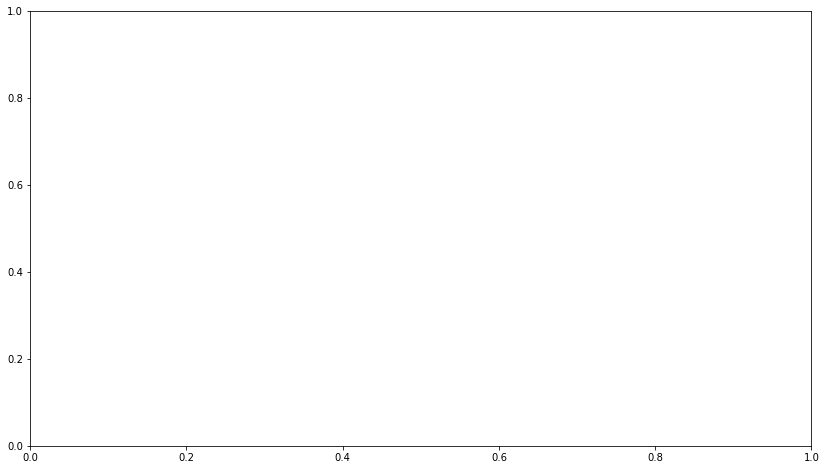

In [17]:
with mlflow.start_run() as run:
    fig, ax = plt.subplots(1,1, figsize=(14,8))
    
    ## log parameters to mllib
    mlflow.log_params(params)
    
    ## Support vector classifier
    model = svm.SVC(**params)
    model.fit(X_train_split, y_train_split)
    
    ## Calculate Metrics
    tr = model.score(X_train_split, y_train_split)
    vl = model.score(X_val,y_val)
    tt = model.score(X_test,y_test)
    
    ## Save metrics
    mlflow.log_metric("train", tr)
    mlflow.log_metric("valid", vl)
    mlflow.log_metric("test", tt)
    
    ## Save model
    save_model(model, model_name)
    
    ## Make a figure
    fig, ax = plt.subplots(1,1, figsize=(14,8))

    ax.bar(range(3),[tr,vl,tt])

    ax.set_ylim(0.95,1)
    ax.set_xticks(range(3))
    ax.set_xticklabels(["train","test","valid"])

    ax.set_title("Loss in Data Partition")
    
    ## Save a figure
    fig_path = f"loss_fig_{model_name}.png"
    fig.savefig(fig_path)
    mlflow.log_artifact(fig_path)
    
    ## Attempting to stop show of figure
    plt.close(fig)
    None
    
## A box may still show up because Jupyter notebooks are awful
None